In [61]:
!pip install tensorflow opencv-python matplotlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

Defaulting to user installation because normal site-packages is not writeable


In [62]:
!pip list

Package                      Version
---------------------------- ----------------
absl-py                      2.1.0
apturl                       0.5.2
asn1crypto                   1.4.0
asttokens                    2.4.1
astunparse                   1.6.3
bcrypt                       3.2.0
blinker                      1.4
Brlapi                       0.8.3
certifi                      2020.6.20
chardet                      4.0.0
click                        8.0.3
colorama                     0.4.4
comm                         0.2.2
command-not-found            0.3
contourpy                    1.2.1
cryptography                 3.4.8
cupshelpers                  1.0
cycler                       0.12.1
dbus-python                  1.2.18
debugpy                      1.8.1
decorator                    5.1.1
defer                        1.0.6
distro                       1.7.0
distro-info                  1.1+ubuntu0.2
duplicity                    0.8.21
et-xmlfile                   1.1.

In [5]:
import tensorflow as tf
import os

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
tf.config.list_physical_devices('GPU')

[]

In [8]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [9]:
pwd

'/home/ashutosh/Desktop/DeepLearningProject/PCOS_ImgClassifier'

In [12]:
data_dir = 'PCOS_Training'

In [13]:
image_exts = ['jpeg','jpg','png']

In [14]:
os.listdir(data_dir)

['healthy_images', 'unhealthy_images']

In [15]:
os.listdir(os.path.join(data_dir , 'healthy_images'))

['image0751.jpg',
 'image2107.jpg',
 'pco_4.jpg',
 'image3615.jpg',
 'image0198.jpg',
 'image2371.jpg',
 'image2770.jpg',
 '9image20.jpg',
 'image3648.jpg',
 'image3572.jpg',
 'image2687.jpg',
 'normal_40.jpg',
 'image2911.jpg',
 'image2744.jpg',
 'image3552.jpg',
 '1779image22.jpg',
 'image0941.jpg',
 '99image28.jpg',
 'image2975.jpg',
 'image1660.jpg',
 'image1828.jpg',
 'image3378.jpg',
 'image2754.jpg',
 '16image48.jpg',
 '1209image17.jpg',
 'image2856.jpg',
 'image3353.jpg',
 'image1652.jpg',
 'image2617.jpg',
 'image3139.jpg',
 'image3668.jpg',
 'image2807.jpg',
 'image2834.jpg',
 'image1121.jpg',
 'image3089.jpg',
 'image3631.jpg',
 'pco_14.jpg',
 'image3124.jpg',
 'image2892.jpg',
 '8image18.jpg',
 'image2462.jpg',
 'normal_29.jpg',
 'image0294.jpg',
 'image2733.jpg',
 'image3278.jpg',
 'image3637.jpg',
 'image3280.jpg',
 'image2988.jpg',
 'image3472.jpg',
 '154image24.jpg',
 'image2917.jpg',
 'image2974.jpg',
 '96image56.jpg',
 '501image3.jpg',
 'image3689.jpg',
 'image0865.jp

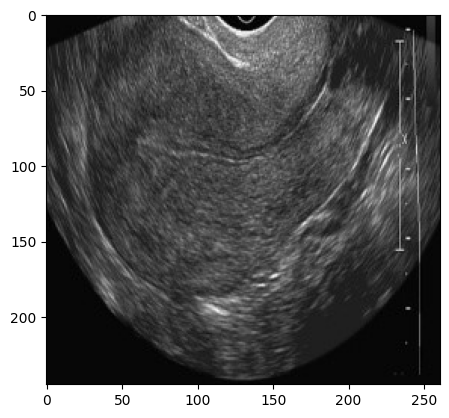

In [16]:
img = cv2.imread(os.path.join('PCOS_Training' , 'healthy_images' , 'image3726.jpg'))
img.shape
plt.imshow(img)


In [17]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path) 

In [14]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [18]:
import numpy as np
from matplotlib import pyplot as plt

In [19]:
data = tf.keras.utils.image_dataset_from_directory('PCOS_Training')


Found 2491 files belonging to 2 classes.


In [20]:
# Print class names
print("Class Names:", data.class_names)

# Alternatively, you can print the labels assigned to each class
for i, class_name in enumerate(data.class_names):
    print(f"Label for class {class_name}: {i}")

Class Names: ['healthy_images', 'unhealthy_images']
Label for class healthy_images: 0
Label for class unhealthy_images: 1


In [21]:
data_iterator = data.as_numpy_iterator()

In [22]:
data_iterator


NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x786ca26b84c0>)

In [23]:
batch = data_iterator.next()

In [24]:
batch


(array([[[[ 3.        ,  3.        ,  3.        ],
          [ 3.        ,  3.        ,  3.        ],
          [ 3.        ,  3.        ,  3.        ],
          ...,
          [ 3.        ,  3.        ,  3.        ],
          [ 3.        ,  3.        ,  3.        ],
          [ 3.        ,  3.        ,  3.        ]],
 
         [[ 3.        ,  3.        ,  3.        ],
          [ 3.        ,  3.        ,  3.        ],
          [ 3.        ,  3.        ,  3.        ],
          ...,
          [ 3.        ,  3.        ,  3.        ],
          [ 3.        ,  3.        ,  3.        ],
          [ 3.        ,  3.        ,  3.        ]],
 
         [[ 3.        ,  3.        ,  3.        ],
          [ 3.        ,  3.        ,  3.        ],
          [ 3.        ,  3.        ,  3.        ],
          ...,
          [ 3.        ,  3.        ,  3.        ],
          [ 3.        ,  3.        ,  3.        ],
          [ 3.        ,  3.        ,  3.        ]],
 
         ...,
 
         [[ 

In [25]:
batch[0]

array([[[[ 3.        ,  3.        ,  3.        ],
         [ 3.        ,  3.        ,  3.        ],
         [ 3.        ,  3.        ,  3.        ],
         ...,
         [ 3.        ,  3.        ,  3.        ],
         [ 3.        ,  3.        ,  3.        ],
         [ 3.        ,  3.        ,  3.        ]],

        [[ 3.        ,  3.        ,  3.        ],
         [ 3.        ,  3.        ,  3.        ],
         [ 3.        ,  3.        ,  3.        ],
         ...,
         [ 3.        ,  3.        ,  3.        ],
         [ 3.        ,  3.        ,  3.        ],
         [ 3.        ,  3.        ,  3.        ]],

        [[ 3.        ,  3.        ,  3.        ],
         [ 3.        ,  3.        ,  3.        ],
         [ 3.        ,  3.        ,  3.        ],
         ...,
         [ 3.        ,  3.        ,  3.        ],
         [ 3.        ,  3.        ,  3.        ],
         [ 3.        ,  3.        ,  3.        ]],

        ...,

        [[ 2.        ,  2.        ,  2

In [26]:
batch[1]

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int32)

In [27]:

batch[0].max()


255.0

In [28]:
scaled = batch[0]/255

In [29]:
scaled.max()

1.0

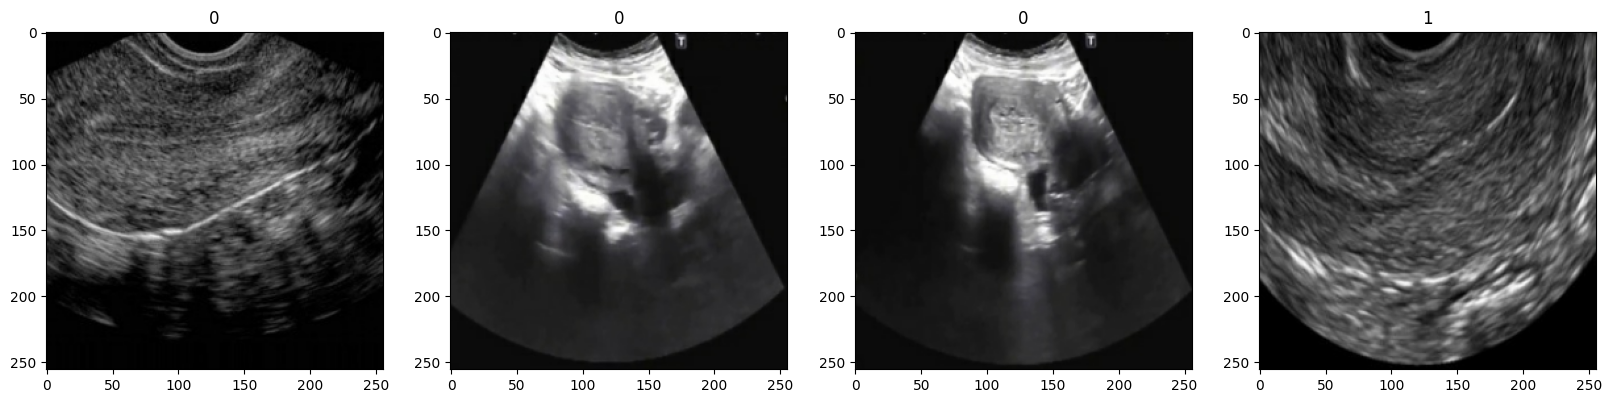

In [30]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [31]:
data = data.map(lambda x , y: (x/255 , y))

In [32]:
data.as_numpy_iterator().next()[0].max()

1.0

In [33]:
scaled_iterator = data.as_numpy_iterator()

In [34]:
batch = scaled_iterator.next()

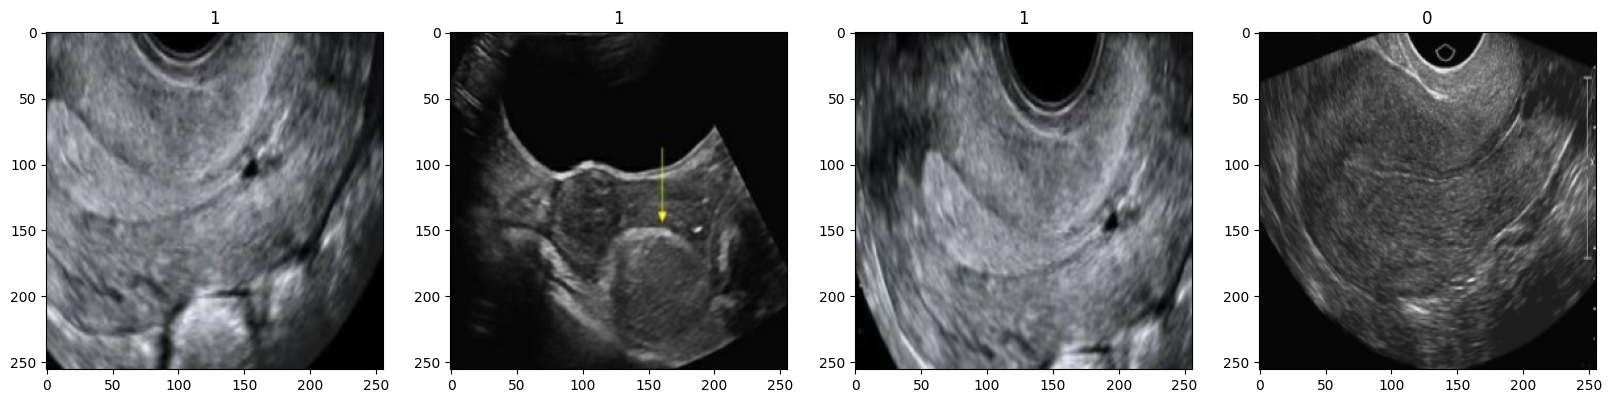

In [35]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [36]:
len(data)


78

In [37]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)



In [38]:
train_size

54

In [39]:
val_size

15

In [40]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [41]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [43]:
model = Sequential()

In [44]:

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/home/ashutosh/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [45]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
logdir='logs'

In [49]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [50]:
hist = model.fit(train, epochs=60, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.5902 - loss: 0.7641

2024-05-08 11:34:34.674130: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 224ms/step - accuracy: 0.5911 - loss: 0.7619 - val_accuracy: 0.6667 - val_loss: 0.5777
Epoch 2/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.7046 - loss: 0.5462

2024-05-08 11:34:46.612495: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 219ms/step - accuracy: 0.7047 - loss: 0.5461 - val_accuracy: 0.6958 - val_loss: 0.5404
Epoch 3/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.7540 - loss: 0.4850

2024-05-08 11:34:58.612761: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 219ms/step - accuracy: 0.7539 - loss: 0.4848 - val_accuracy: 0.6958 - val_loss: 0.5442
Epoch 4/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.7649 - loss: 0.4482

2024-05-08 11:35:10.587159: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 220ms/step - accuracy: 0.7651 - loss: 0.4479 - val_accuracy: 0.7146 - val_loss: 0.4856
Epoch 5/60


2024-05-08 11:35:11.655964: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.7931 - loss: 0.4191

2024-05-08 11:35:22.582311: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 219ms/step - accuracy: 0.7931 - loss: 0.4190 - val_accuracy: 0.7188 - val_loss: 0.5230
Epoch 6/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.7874 - loss: 0.4212

2024-05-08 11:35:34.874119: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 223ms/step - accuracy: 0.7875 - loss: 0.4209 - val_accuracy: 0.7417 - val_loss: 0.4910
Epoch 7/60


2024-05-08 11:35:35.780560: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.8251 - loss: 0.3617

2024-05-08 11:35:46.810971: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 220ms/step - accuracy: 0.8252 - loss: 0.3617 - val_accuracy: 0.7333 - val_loss: 0.5572
Epoch 8/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.8560 - loss: 0.3106

2024-05-08 11:35:58.496061: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 213ms/step - accuracy: 0.8558 - loss: 0.3107 - val_accuracy: 0.7229 - val_loss: 0.5350
Epoch 9/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.8582 - loss: 0.2986

2024-05-08 11:36:08.655069: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step - accuracy: 0.8583 - loss: 0.2986 - val_accuracy: 0.7104 - val_loss: 0.5531
Epoch 10/60


2024-05-08 11:36:09.608530: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.8663 - loss: 0.2828

2024-05-08 11:36:19.552651: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 198ms/step - accuracy: 0.8664 - loss: 0.2828 - val_accuracy: 0.7500 - val_loss: 0.5504
Epoch 11/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.8742 - loss: 0.2660

2024-05-08 11:36:30.407170: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 201ms/step - accuracy: 0.8744 - loss: 0.2659 - val_accuracy: 0.7604 - val_loss: 0.5089
Epoch 12/60


2024-05-08 11:36:31.422382: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.8905 - loss: 0.2431

2024-05-08 11:36:41.466278: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 201ms/step - accuracy: 0.8905 - loss: 0.2433 - val_accuracy: 0.7563 - val_loss: 0.6061
Epoch 13/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.8848 - loss: 0.2420

2024-05-08 11:36:52.256372: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 197ms/step - accuracy: 0.8848 - loss: 0.2421 - val_accuracy: 0.7688 - val_loss: 0.5689
Epoch 14/60


2024-05-08 11:36:53.173848: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.8928 - loss: 0.2423

2024-05-08 11:37:03.498727: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 207ms/step - accuracy: 0.8930 - loss: 0.2419 - val_accuracy: 0.7792 - val_loss: 0.6181
Epoch 15/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.9084 - loss: 0.2157

2024-05-08 11:37:14.724427: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 207ms/step - accuracy: 0.9085 - loss: 0.2154 - val_accuracy: 0.7875 - val_loss: 0.7492
Epoch 16/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.9122 - loss: 0.2037

2024-05-08 11:37:25.771729: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 201ms/step - accuracy: 0.9123 - loss: 0.2035 - val_accuracy: 0.8104 - val_loss: 0.7105
Epoch 17/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.9263 - loss: 0.2001

2024-05-08 11:37:36.955627: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 207ms/step - accuracy: 0.9264 - loss: 0.1996 - val_accuracy: 0.7625 - val_loss: 0.7471
Epoch 18/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.9166 - loss: 0.1898

2024-05-08 11:37:47.637329: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 194ms/step - accuracy: 0.9167 - loss: 0.1896 - val_accuracy: 0.7917 - val_loss: 0.7826
Epoch 19/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.9207 - loss: 0.1820

2024-05-08 11:37:59.409568: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 218ms/step - accuracy: 0.9208 - loss: 0.1817 - val_accuracy: 0.8000 - val_loss: 0.8222
Epoch 20/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.9437 - loss: 0.1599

2024-05-08 11:38:10.874565: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 208ms/step - accuracy: 0.9438 - loss: 0.1596 - val_accuracy: 0.7854 - val_loss: 0.7845
Epoch 21/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.9495 - loss: 0.1306

2024-05-08 11:38:21.781252: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 200ms/step - accuracy: 0.9496 - loss: 0.1305 - val_accuracy: 0.7896 - val_loss: 1.0773
Epoch 22/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.9618 - loss: 0.1174

2024-05-08 11:38:32.618752: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 200ms/step - accuracy: 0.9617 - loss: 0.1174 - val_accuracy: 0.7979 - val_loss: 0.9413
Epoch 23/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.9598 - loss: 0.1063

2024-05-08 11:38:43.636536: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 201ms/step - accuracy: 0.9596 - loss: 0.1066 - val_accuracy: 0.8083 - val_loss: 0.7818
Epoch 24/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.9516 - loss: 0.1112

2024-05-08 11:38:54.743895: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 205ms/step - accuracy: 0.9518 - loss: 0.1111 - val_accuracy: 0.7917 - val_loss: 0.7667
Epoch 25/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.9505 - loss: 0.1110

2024-05-08 11:39:05.523119: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 196ms/step - accuracy: 0.9507 - loss: 0.1108 - val_accuracy: 0.7958 - val_loss: 0.7753
Epoch 26/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.9575 - loss: 0.1033

2024-05-08 11:39:15.919135: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - accuracy: 0.9576 - loss: 0.1033 - val_accuracy: 0.7917 - val_loss: 0.8088
Epoch 27/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.9701 - loss: 0.0712

2024-05-08 11:39:26.372368: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - accuracy: 0.9700 - loss: 0.0714 - val_accuracy: 0.8104 - val_loss: 0.7494
Epoch 28/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.9613 - loss: 0.0902

2024-05-08 11:39:36.776588: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - accuracy: 0.9614 - loss: 0.0901 - val_accuracy: 0.8146 - val_loss: 0.6675
Epoch 29/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.9681 - loss: 0.0844

2024-05-08 11:39:48.012477: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 209ms/step - accuracy: 0.9682 - loss: 0.0842 - val_accuracy: 0.8146 - val_loss: 0.8560
Epoch 30/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.9720 - loss: 0.0720

2024-05-08 11:39:58.592377: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 192ms/step - accuracy: 0.9721 - loss: 0.0718 - val_accuracy: 0.7979 - val_loss: 0.8961
Epoch 31/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.9787 - loss: 0.0729

2024-05-08 11:40:09.257658: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 195ms/step - accuracy: 0.9788 - loss: 0.0726 - val_accuracy: 0.8083 - val_loss: 0.8392
Epoch 32/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.9776 - loss: 0.0513

2024-05-08 11:40:19.805703: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 193ms/step - accuracy: 0.9777 - loss: 0.0514 - val_accuracy: 0.8271 - val_loss: 0.8475
Epoch 33/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.9770 - loss: 0.0731

2024-05-08 11:40:30.261472: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 192ms/step - accuracy: 0.9771 - loss: 0.0728 - val_accuracy: 0.8292 - val_loss: 0.9421
Epoch 34/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.9808 - loss: 0.0631

2024-05-08 11:40:40.908975: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 196ms/step - accuracy: 0.9808 - loss: 0.0629 - val_accuracy: 0.8292 - val_loss: 1.0135
Epoch 35/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step - accuracy: 0.9806 - loss: 0.0526

2024-05-08 11:41:16.637728: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 484ms/step - accuracy: 0.9807 - loss: 0.0525 - val_accuracy: 0.8271 - val_loss: 0.9480
Epoch 36/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.9852 - loss: 0.0381

2024-05-08 11:41:28.644215: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 219ms/step - accuracy: 0.9853 - loss: 0.0382 - val_accuracy: 0.8333 - val_loss: 0.9400
Epoch 37/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.9897 - loss: 0.0299

2024-05-08 11:41:40.040235: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 211ms/step - accuracy: 0.9897 - loss: 0.0299 - val_accuracy: 0.8208 - val_loss: 0.8945
Epoch 38/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.9938 - loss: 0.0230

2024-05-08 11:41:50.979690: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 199ms/step - accuracy: 0.9937 - loss: 0.0233 - val_accuracy: 0.8062 - val_loss: 0.9252
Epoch 39/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.9907 - loss: 0.0303

2024-05-08 11:42:01.648302: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 194ms/step - accuracy: 0.9907 - loss: 0.0303 - val_accuracy: 0.7937 - val_loss: 1.1678
Epoch 40/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.9892 - loss: 0.0383

2024-05-08 11:42:12.090107: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - accuracy: 0.9892 - loss: 0.0383 - val_accuracy: 0.8271 - val_loss: 0.7855
Epoch 41/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.9879 - loss: 0.0319

2024-05-08 11:42:22.547498: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - accuracy: 0.9879 - loss: 0.0319 - val_accuracy: 0.8229 - val_loss: 0.8454
Epoch 42/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.9903 - loss: 0.0352

2024-05-08 11:42:32.981088: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - accuracy: 0.9903 - loss: 0.0352 - val_accuracy: 0.8188 - val_loss: 0.9346
Epoch 43/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.9929 - loss: 0.0268

2024-05-08 11:42:43.381720: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - accuracy: 0.9929 - loss: 0.0270 - val_accuracy: 0.8271 - val_loss: 0.9304
Epoch 44/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.9945 - loss: 0.0229

2024-05-08 11:42:53.727435: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 189ms/step - accuracy: 0.9945 - loss: 0.0229 - val_accuracy: 0.8396 - val_loss: 0.8748
Epoch 45/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.9877 - loss: 0.0359

2024-05-08 11:43:04.078227: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 190ms/step - accuracy: 0.9877 - loss: 0.0358 - val_accuracy: 0.8208 - val_loss: 0.9366
Epoch 46/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.9937 - loss: 0.0160

2024-05-08 11:43:14.391071: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 189ms/step - accuracy: 0.9937 - loss: 0.0162 - val_accuracy: 0.8250 - val_loss: 0.8672
Epoch 47/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.9953 - loss: 0.0161

2024-05-08 11:43:25.987306: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 213ms/step - accuracy: 0.9953 - loss: 0.0162 - val_accuracy: 0.8167 - val_loss: 1.0191
Epoch 48/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.9917 - loss: 0.0341

2024-05-08 11:43:36.476971: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 196ms/step - accuracy: 0.9917 - loss: 0.0339 - val_accuracy: 0.8208 - val_loss: 0.9591
Epoch 49/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.9897 - loss: 0.0296

2024-05-08 11:43:49.763228: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 245ms/step - accuracy: 0.9897 - loss: 0.0295 - val_accuracy: 0.8208 - val_loss: 0.9768
Epoch 50/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.9908 - loss: 0.0276

2024-05-08 11:44:02.562094: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 235ms/step - accuracy: 0.9908 - loss: 0.0276 - val_accuracy: 0.7958 - val_loss: 1.1218
Epoch 51/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.9946 - loss: 0.0183

2024-05-08 11:44:15.493962: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 236ms/step - accuracy: 0.9946 - loss: 0.0184 - val_accuracy: 0.8188 - val_loss: 0.8979
Epoch 52/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.9938 - loss: 0.0164

2024-05-08 11:44:28.325208: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 233ms/step - accuracy: 0.9938 - loss: 0.0165 - val_accuracy: 0.8250 - val_loss: 0.8968
Epoch 53/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.9961 - loss: 0.0170

2024-05-08 11:44:41.028333: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 233ms/step - accuracy: 0.9961 - loss: 0.0171 - val_accuracy: 0.8458 - val_loss: 0.8473
Epoch 54/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.9954 - loss: 0.0226

2024-05-08 11:44:53.839742: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 236ms/step - accuracy: 0.9954 - loss: 0.0225 - val_accuracy: 0.8271 - val_loss: 1.0604
Epoch 55/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.9923 - loss: 0.0291

2024-05-08 11:45:06.688702: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 235ms/step - accuracy: 0.9923 - loss: 0.0291 - val_accuracy: 0.8167 - val_loss: 0.8978
Epoch 56/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.9909 - loss: 0.0223

2024-05-08 11:45:19.553565: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 235ms/step - accuracy: 0.9909 - loss: 0.0222 - val_accuracy: 0.8250 - val_loss: 0.9915
Epoch 57/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.9895 - loss: 0.0277

2024-05-08 11:45:32.646737: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 240ms/step - accuracy: 0.9896 - loss: 0.0275 - val_accuracy: 0.8375 - val_loss: 1.0508
Epoch 58/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.9947 - loss: 0.0229

2024-05-08 11:45:45.674480: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 236ms/step - accuracy: 0.9947 - loss: 0.0229 - val_accuracy: 0.8292 - val_loss: 0.9421
Epoch 59/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.9956 - loss: 0.0151

2024-05-08 11:45:58.581097: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 238ms/step - accuracy: 0.9956 - loss: 0.0152 - val_accuracy: 0.8271 - val_loss: 0.8883
Epoch 60/60
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.9941 - loss: 0.0186

2024-05-08 11:46:11.468061: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 234ms/step - accuracy: 0.9941 - loss: 0.0186 - val_accuracy: 0.8104 - val_loss: 1.1057


In [51]:
hist

In [52]:
hist.history

{'accuracy': [0.640625,
  0.7077546119689941,
  0.75,
  0.7795138955116272,
  0.7922453880310059,
  0.7951388955116272,
  0.8298611044883728,
  0.8443287014961243,
  0.8634259104728699,
  0.8703703880310059,
  0.8819444179534912,
  0.8859953880310059,
  0.8859953880310059,
  0.8993055820465088,
  0.9126157164573669,
  0.9184027910232544,
  0.9340277910232544,
  0.9236111044883728,
  0.9276620149612427,
  0.9490740895271301,
  0.9537037014961243,
  0.9583333134651184,
  0.9519675970077515,
  0.9600694179534912,
  0.9589120149612427,
  0.9618055820465088,
  0.9646990895271301,
  0.9681712985038757,
  0.9745370149612427,
  0.9791666865348816,
  0.9809027910232544,
  0.9785879850387573,
  0.9837962985038757,
  0.9832175970077515,
  0.9849537014961243,
  0.9872685074806213,
  0.9890046119689941,
  0.9890046119689941,
  0.9907407164573669,
  0.9884259104728699,
  0.9872685074806213,
  0.9890046119689941,
  0.9918981194496155,
  0.9918981194496155,
  0.9901620149612427,
  0.9930555820465088,


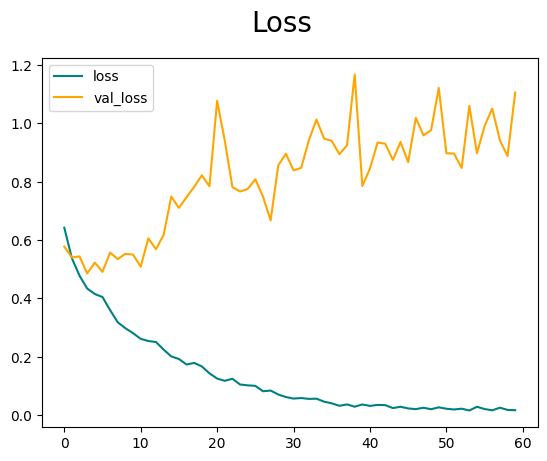

In [61]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

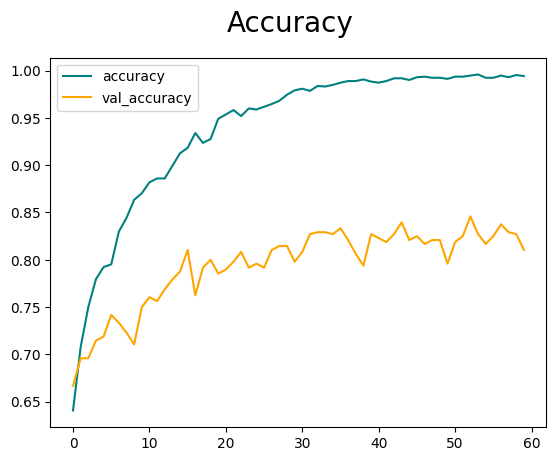

In [62]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [63]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [64]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [65]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2024-05-08 13:50:53.469180: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


2024-05-08 13:50:55.212067: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [66]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.8055556, shape=(), dtype=float32) tf.Tensor(0.79452056, shape=(), dtype=float32) tf.Tensor(0.7410714, shape=(), dtype=float32)


In [105]:
import cv2

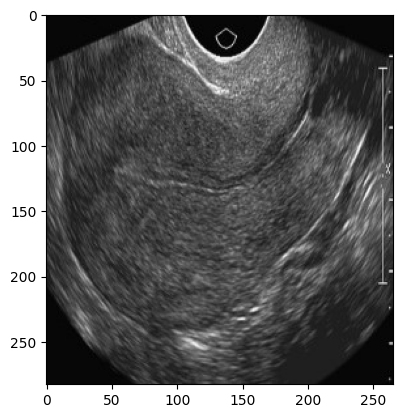

In [107]:
img = cv2.imread('./PCOS_Training/healthy_images/image2744.jpg')
plt.imshow(img)
plt.show()

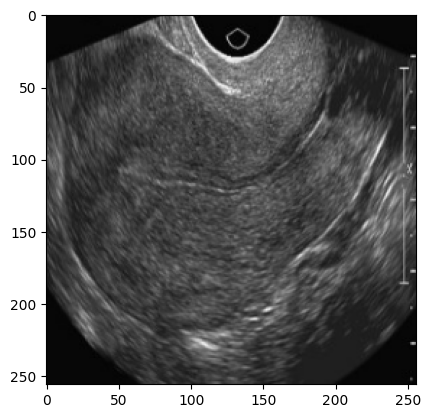

In [108]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [109]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


In [110]:
yhat

array([[0.92157257]], dtype=float32)

In [111]:
if yhat > 0.5: 
    print(f'Predicted class is Healthy')
else:
    print(f'Predicted class is Sad')

Predicted class is Healthy
